# Extract measures and beat

In [ ]:
import numpy as np
from typing import Callable
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
from groove.downbeats import get_measures, smooth_power, beat_peaks, beat_stdev



%load_ext autoreload
%autoreload 2

# Testing functions
def do_test(file: str, process: Callable, beat_find: Callable, mstart = None, mend = None, ext="mp3"):

    raw_measures, proc_measures, sr = get_measures(file, process, ext)

    if mstart != None and mend == None:
        mend = mstart
    if mstart == None:
        mstart = 0
        if mend == None:
            mend = len(raw_measures) - 1
    
    raw = np.zeros(0)
    proc = np.zeros(0)
    beat_frames = np.zeros(0)
    clicks = np.zeros(0)
    for i in range(mstart, mend+1):
        m_beat_frames = beat_find(proc_measures[i], sr)
        m_clicks = librosa.clicks(times=m_beat_frames/sr, length=raw_measures[i].shape[0], sr=sr)
        
        # Add to running arrays
        beat_frames = np.append(beat_frames, m_beat_frames + raw.shape[0])
        raw = np.append(raw, raw_measures[i])
        proc = np.append(proc, proc_measures[i])
        clicks = np.append(clicks, m_clicks)


    plt.figure(figsize=(20, 5))
    plt.plot(raw)
    plt.plot(proc)
    plt.scatter(beat_frames, np.zeros(beat_frames.shape), marker='o', color='red', zorder=10)
    display(Audio(data=raw, rate=sr))
    display(Audio(data=raw + clicks, rate=sr))

# Some tests

Syntax: do_test(name of file without extension, one of the "processing" functions above, one of the "beat finding" functions above, starting measure, ending measure, extension if not mp3)

If both start measure and end measure omitted, defaults to entire song
If start measure specified but end measure omitted, only does that one measure

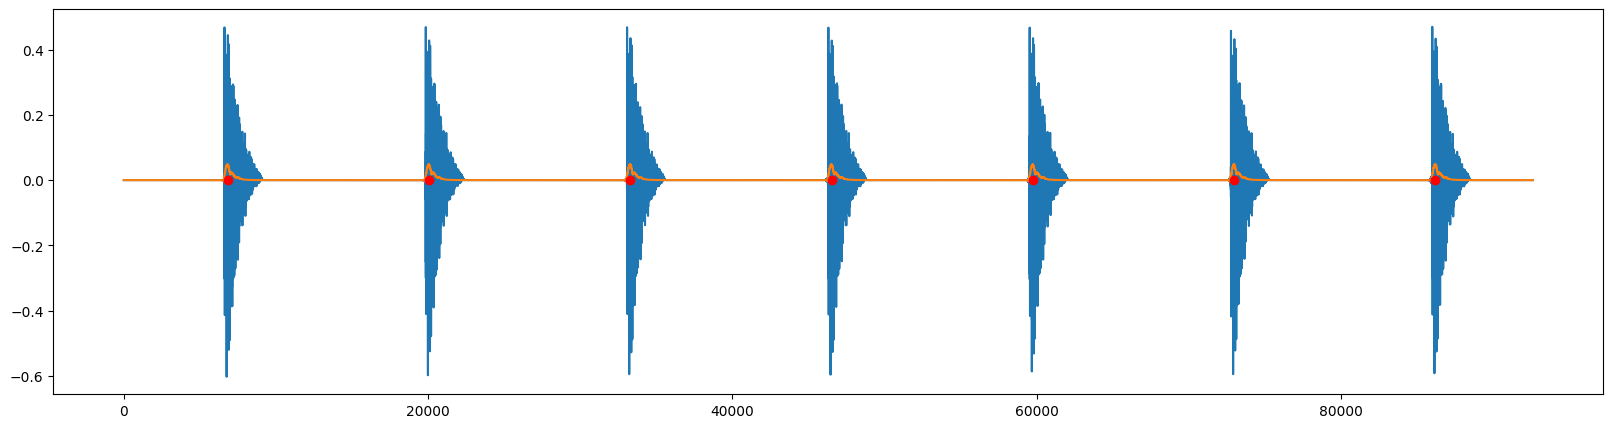

In [5]:
do_test('100bpm', smooth_power, beat_peaks)

In the following test, we have two measures with identical beats.  The first measure I'd say is correct.  The second picks up a few strays.

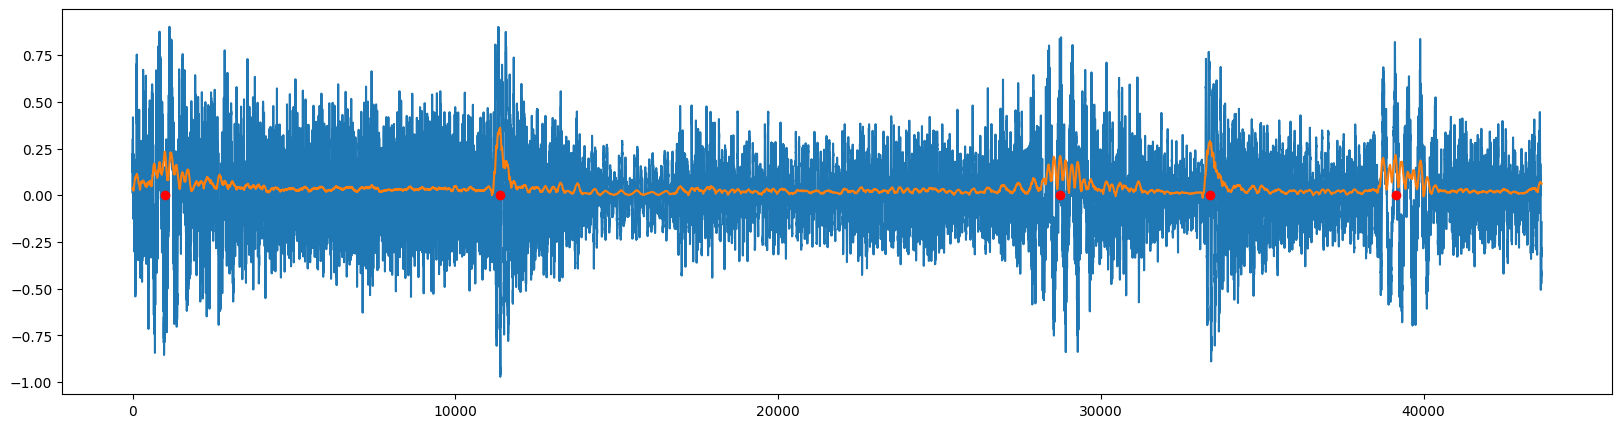

In [10]:
do_test('milaklaw', smooth_power, beat_peaks, 125)

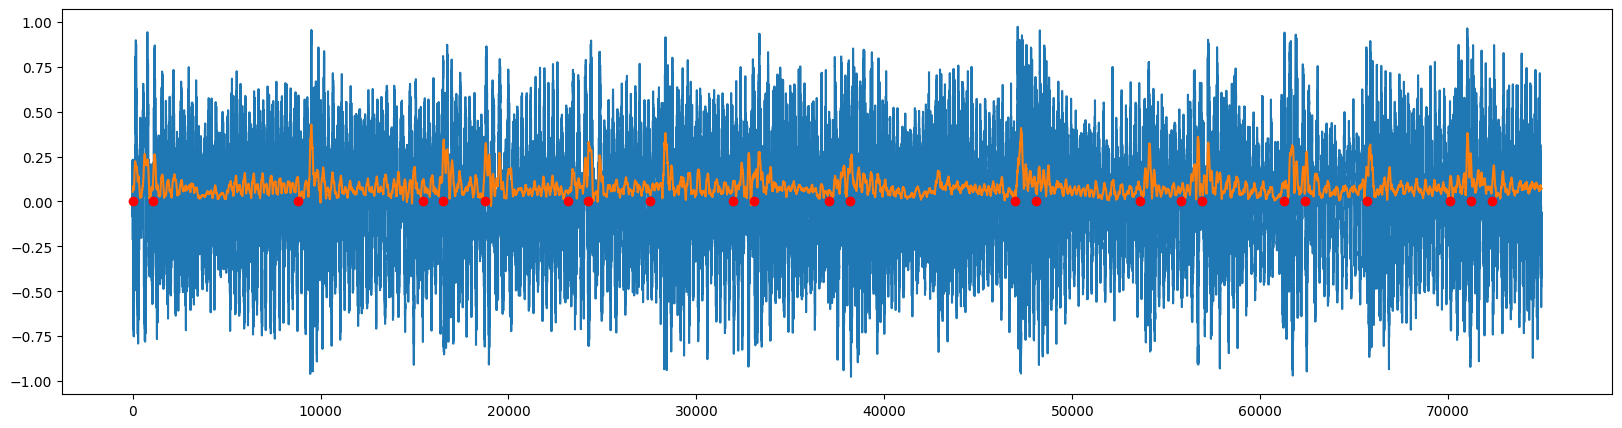

In [7]:
do_test('milaklaw', smooth_power, beat_stdev, 25, 26)

file = 'lms'
i = 22

Here, there's a constant bass drumbeat in the background that doesn't really get picked up, also maybe some multiple clicks

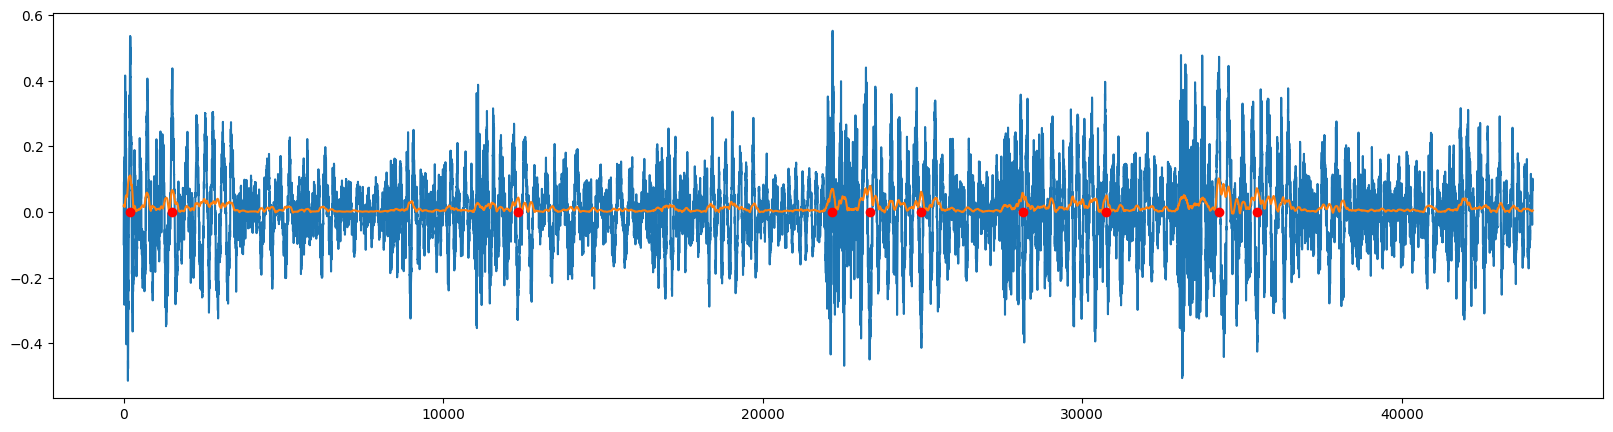

In [8]:
do_test('lms', smooth_power, beat_peaks, 22)


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


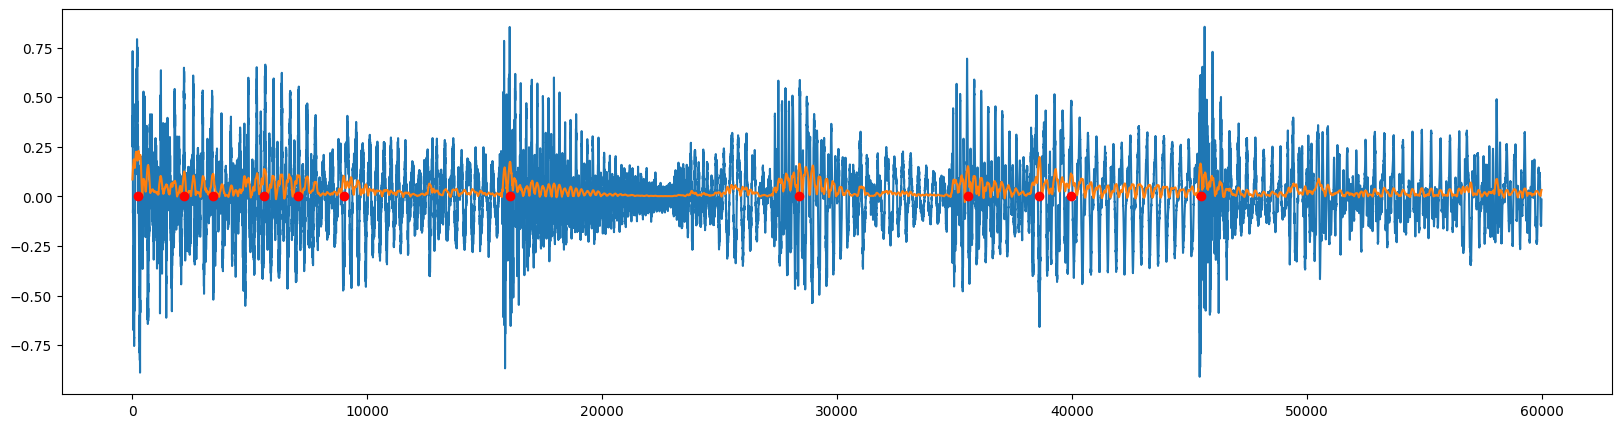

In [9]:
do_test('06 Encore A', smooth_power, beat_peaks, 20)

/tmp/ipykernel_338683/2867483872.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(f'beatnet/inputs/{file}.{ext}')
/home/harrison/erdos/groove_gang/venv/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


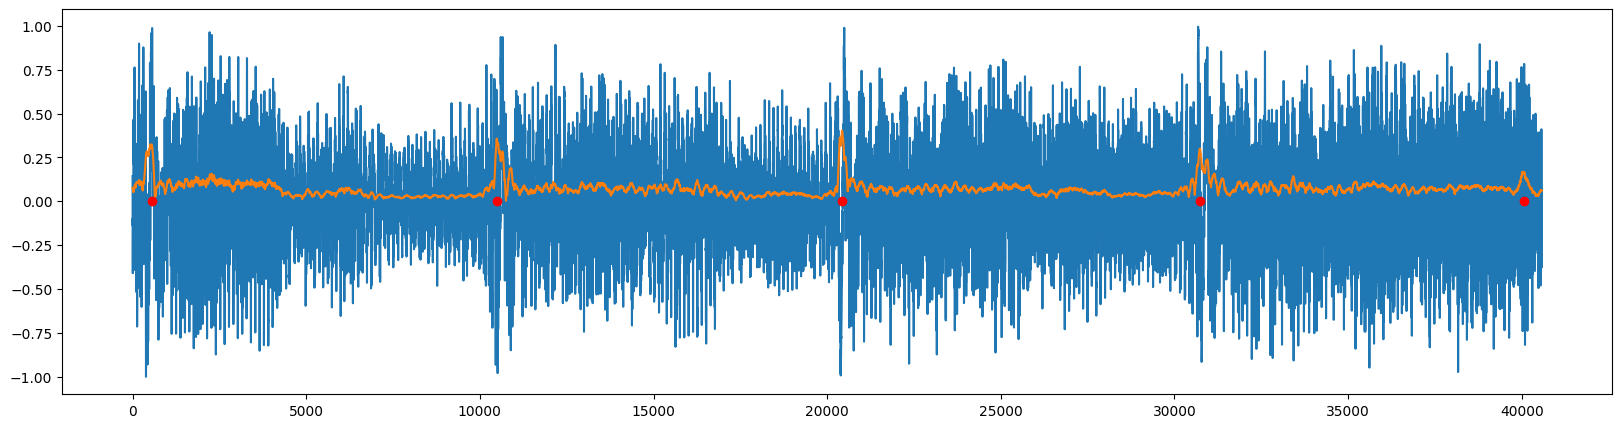

In [10]:
do_test('03 All the Pretty Girls', smooth_power, beat_peaks, 25, ext='m4a')

This one doesn't work so well, I think because a lot of the hits are close to each other and some are a bit soft.

/tmp/ipykernel_338683/2867483872.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(f'beatnet/inputs/{file}.{ext}')
/home/harrison/erdos/groove_gang/venv/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


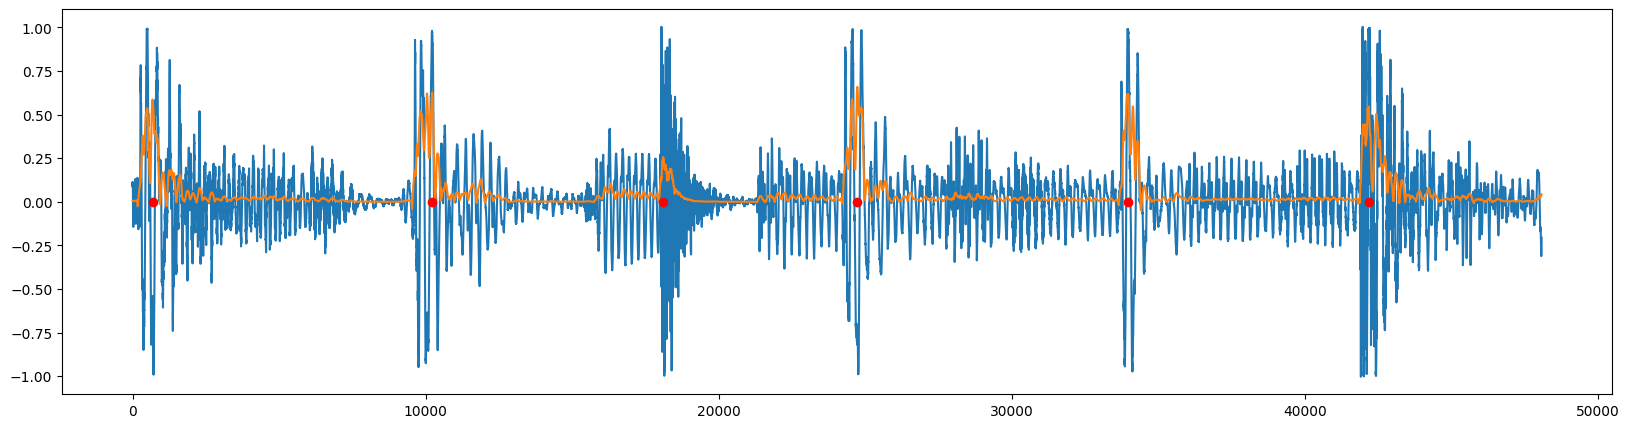

In [11]:
do_test('09 D\'Angelo - Spanish Joint', smooth_power, beat_peaks, 25, ext='m4a')

I have a hard time hearing the beat in this one.

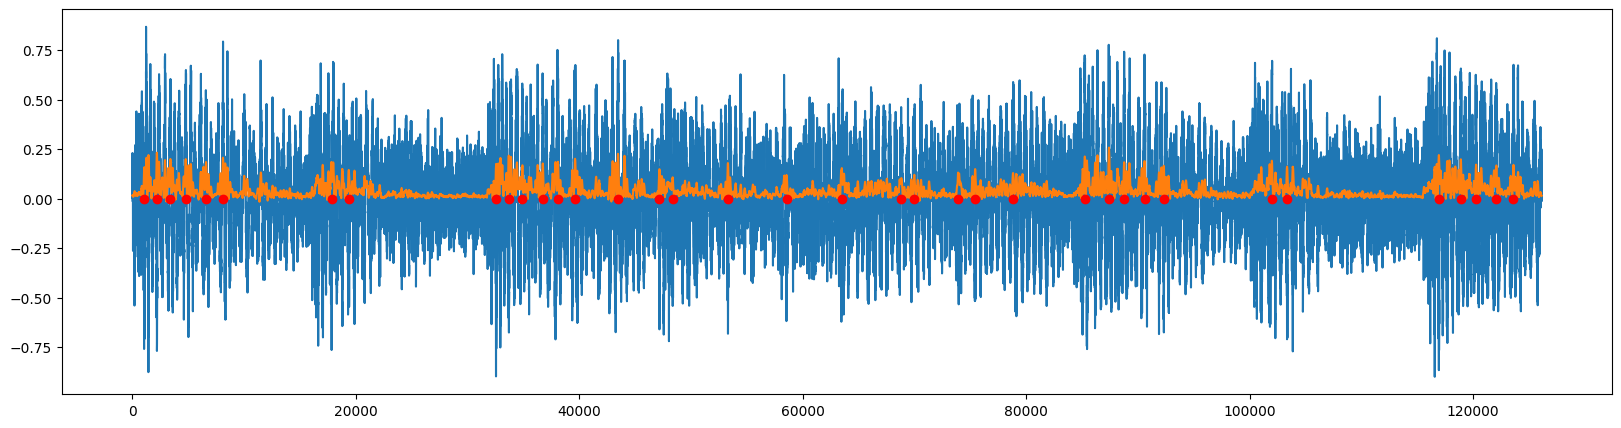

In [5]:
do_test('fengs', smooth_power, beat_peaks, 20, 22)

Try whole song

In [3]:
#do_test('milaklaw', smooth_power, beat_peaks)